In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer


# - Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

Utilitzarem un fragment de la biografia de Maurits Cornelis Escher (1898-1972) extret de la seva pàgina web https://mcescher.com/about/biography/

In [54]:
text = """Maurits Cornelis Escher (1898-1972) is one of the world’s most famous graphic artists. His art is admired by millions of people worldwide, as can be seen by the many websites on the internet.

He was born in Leeuwarden as the fourth and youngest son. After five years, the family moved to Arnhem, where he spent most of his youth. After failing his final exam and a short interlude in Delft, M.C. Escher started his lessons in architecture at the School of Architecture and Decorative Arts in Haarlem.
After just a week, he informed his father that he wanted to quit his architecture lessons and focus on studying graphic arts. He was supported in this decision by his teacher Samuel Jesserun de Mesquita, to whom he had shown his drawings and linocuts.

After completing his studies, he traveled extensively through Italy, where he met his wife Jetta Umiker and married her in 1924. They settled in Rome, where they lived until 1935. During these 11 years, M.C. Escher traveled to Italy every year, making drawings and sketches that he later used in his studio for his lithographs, woodcuts, and wood engravings.

For example, the background in the lithograph 'Waterfall' (1961) comes from his time in Italy. The trees reflected in the woodcut 'Puddle' (1952) are also the same trees he used in his woodcut 'Pineta by Calvi,' created in 1932.

While living and working in Italy, he created beautiful, more realistic works, such as the lithograph 'Castrovalva,' which already showed his fascination with perspective: close, far, high, and low. Another notable work is the lithograph 'Atrani,' depicting a small town on the Amalfi coast in Italy, which he created in 1931 and later revisited in his masterpieces 'Metamorphosis I' and 'Metamorphosis II.'

Escher is most famous for his so-called impossible drawings, such as 'Ascending and Descending' and 'Relativity,' but also for his metamorphoses, such as 'Metamorphosis I,' 'Metamorphosis II,' and 'Metamorphosis III,' as well as 'Air and Water I' and 'Reptiles.'

Throughout his lifetime, Escher produced 448 lithographs, woodcuts, and wood engravings, along with more than 2000 drawings and sketches. In addition to his work as a graphic artist, he also illustrated books and designed carpets, banknotes, stamps, murals, and intarsia panels, among other things.
M.C. Escher was fascinated by the regular geometric figures found in the wall and floor mosaics of the Alhambra, a fourteenth-century castle in Granada, Spain, which he visited in 1922 and 1936.

During his years in Switzerland and throughout the Second World War, he devoted himself to his hobby with great energy. During this time, he created 62 of the 137 symmetrical drawings he would produce in his lifetime. He also expanded his hobby by using these symmetrical drawings to create wooden balls.

Escher played with architecture, perspective, and impossible spaces. His art continues to amaze and inspire millions of people around the world. Through his work, we can see his keen observation of the world and his expression of his own imagination. M.C. Escher shows us that reality is wonderful, understandable, and fascinating."""


Tokenizem (separem les paraules)

In [55]:
tok = word_tokenize(text)
tok

['Maurits',
 'Cornelis',
 'Escher',
 '(',
 '1898-1972',
 ')',
 'is',
 'one',
 'of',
 'the',
 'world',
 '’',
 's',
 'most',
 'famous',
 'graphic',
 'artists',
 '.',
 'His',
 'art',
 'is',
 'admired',
 'by',
 'millions',
 'of',
 'people',
 'worldwide',
 ',',
 'as',
 'can',
 'be',
 'seen',
 'by',
 'the',
 'many',
 'websites',
 'on',
 'the',
 'internet',
 '.',
 'He',
 'was',
 'born',
 'in',
 'Leeuwarden',
 'as',
 'the',
 'fourth',
 'and',
 'youngest',
 'son',
 '.',
 'After',
 'five',
 'years',
 ',',
 'the',
 'family',
 'moved',
 'to',
 'Arnhem',
 ',',
 'where',
 'he',
 'spent',
 'most',
 'of',
 'his',
 'youth',
 '.',
 'After',
 'failing',
 'his',
 'final',
 'exam',
 'and',
 'a',
 'short',
 'interlude',
 'in',
 'Delft',
 ',',
 'M.C',
 '.',
 'Escher',
 'started',
 'his',
 'lessons',
 'in',
 'architecture',
 'at',
 'the',
 'School',
 'of',
 'Architecture',
 'and',
 'Decorative',
 'Arts',
 'in',
 'Haarlem',
 '.',
 'After',
 'just',
 'a',
 'week',
 ',',
 'he',
 'informed',
 'his',
 'father',
 '

Eliminem els signes de puntuació, i s'inclouran en la llista els tokens que continguin caràcters alfanumèrics

In [56]:
tokens= [word for word in tok if word.isalnum()]
print(tokens)

['Maurits', 'Cornelis', 'Escher', 'is', 'one', 'of', 'the', 'world', 's', 'most', 'famous', 'graphic', 'artists', 'His', 'art', 'is', 'admired', 'by', 'millions', 'of', 'people', 'worldwide', 'as', 'can', 'be', 'seen', 'by', 'the', 'many', 'websites', 'on', 'the', 'internet', 'He', 'was', 'born', 'in', 'Leeuwarden', 'as', 'the', 'fourth', 'and', 'youngest', 'son', 'After', 'five', 'years', 'the', 'family', 'moved', 'to', 'Arnhem', 'where', 'he', 'spent', 'most', 'of', 'his', 'youth', 'After', 'failing', 'his', 'final', 'exam', 'and', 'a', 'short', 'interlude', 'in', 'Delft', 'Escher', 'started', 'his', 'lessons', 'in', 'architecture', 'at', 'the', 'School', 'of', 'Architecture', 'and', 'Decorative', 'Arts', 'in', 'Haarlem', 'After', 'just', 'a', 'week', 'he', 'informed', 'his', 'father', 'that', 'he', 'wanted', 'to', 'quit', 'his', 'architecture', 'lessons', 'and', 'focus', 'on', 'studying', 'graphic', 'arts', 'He', 'was', 'supported', 'in', 'this', 'decision', 'by', 'his', 'teacher', 

Calculem la freqüència de cada paraula al text i mostrem les que més es repeteixen.

In [57]:
df = pd.DataFrame(FreqDist(tokens).items(),columns=['Paraula', 'Freqüència']).sort_values(by="Freqüència", ascending=False)
df.head(20)

,Paraula,Freqüència
34,and,28
47,his,27
31,in,22
6,the,20
45,he,15
5,of,9
42,to,8
2,Escher,8
20,as,8
86,drawings,6


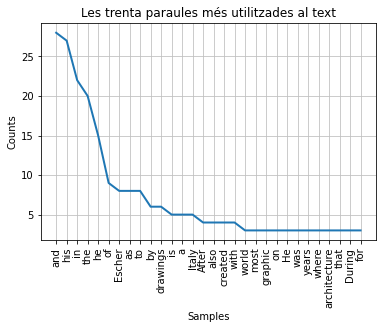

In [58]:
fdist = FreqDist(tokens)
fdist.plot(30, title="Les trenta paraules més utilitzades al text", cumulative=False)
plt.show()


# - Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.



Traiem els stopswords per reduir el 'soroll' que poden causar paraules comunes sense massa significat semàntic al fi d'analitzar el text.

In [59]:
stop = set(stopwords.words("english"))
tokensFiltrats = [token for token in tokens if token.lower() not in stop]

Reduïm les paraules a la seva arrel per simplificar el text

In [60]:
stemmer = PorterStemmer()
stemmedTok = [stemmer.stem(token) for token in tokensFiltrats]

Calculem la freqüència de les paraules i fem un gràfic per veure les 20 paraules més utilitzades en el text.

<FreqDist with 184 samples and 259 outcomes>


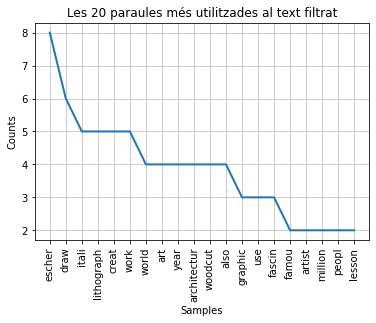

In [61]:
fdist = FreqDist(stemmedTok)
print(fdist)

fdist.plot(20, title="Les 20 paraules més utilitzades al text filtrat", cumulative=False)
plt.show()

# - Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

El text ha estat classificat com 3.4000000000000004 % Negatiu
El text ha estat classificat com 90.3 % Neutral
El text ha estat classificat com 6.3 % Positiu

0.7096
El text és positiu


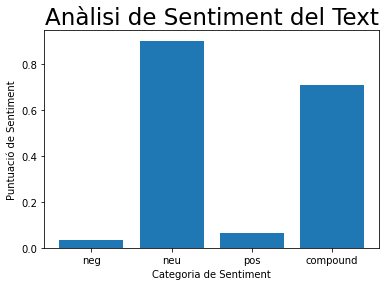

In [62]:
sid = SentimentIntensityAnalyzer()
paraulesAnalitzar = ' '.join(stemmedTok)
sentiment = sid.polarity_scores(paraulesAnalitzar)


print("El text ha estat classificat com", sentiment['neg']*100, "% Negatiu")
print("El text ha estat classificat com", sentiment['neu']*100, "% Neutral")
print("El text ha estat classificat com", sentiment['pos']*100, "% Positiu\n")
print(sentiment['compound'])


if sentiment['compound'] >= 0.3:
    print("El text és positiu")
elif sentiment['compound'] <= -0.3:
    print("El text és negatiu")
else:
    print("El text és neutral")


plt.bar(range(len(sentiment)), list(sentiment.values()), align='center')
plt.xticks(range(len(sentiment)), list(sentiment.keys()))
plt.title('Anàlisi de Sentiment del Text', fontsize=23)
plt.xlabel('Categoria de Sentiment')
plt.ylabel('Puntuació de Sentiment')
plt.show() 




Tot i que hi ha més paraules neutres, un 90%, l'algoritme considera que el text és positiu amb 0.70.
Així que podem concloure que el text és positiu.
